1. 전국지역간 톤급별 화물자동차 통행량 OD   
2. 서울시 행정동단위 CJ대한통운 택배 유형별 월 데이터   
3. 인도 배달 트럭 이동 데이터    

In [51]:
# 라이브러리 불러오기
import pandas as pd

### 인도 배달 트럭 이동 데이터

In [52]:
# 인도 트럭 이동 데이터 
# data 파일의 파일 찾기
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
truck_trips =  pd.read_excel("data/Delivery truck trip data.xlsx")

truck_trips.head()

data\2004-OD-FRE-CAR-04 대전광역권 톤급별 화물자동차 통행량 OD(2003년 기준).ZIP.zip
data\2022-OD-FRE-CAR-00 전국지역간 톤급별 화물자동차 통행량 OD(2021년 기준).zip
data\Delivery truck trip data.xlsx
data\최종 톤급별 화물자동차 통행량 OD.xlsx
data\행정동단위 월별 착지 데이터.csv
data\2004-OD-FRE-CAR-04 대전광역권 톤급별 화물자동차 통행량 OD(2003년 기준).ZIP\�����Ǳ����Ǽ����ڵ�.xls
data\2004-OD-FRE-CAR-04 대전광역권 톤급별 화물자동차 통행량 OD(2003년 기준).ZIP\�����Ǳ�����ȭ���ڷἳ��(2003).hwp
data\2004-OD-FRE-CAR-04 대전광역권 톤급별 화물자동차 통행량 OD(2003년 기준).ZIP\���������� ��޺� ȭ���ڵ��� ���෮ OD(2003�� ����)\01 1�� ����\�����ڵ���01.zip
data\2004-OD-FRE-CAR-04 대전광역권 톤급별 화물자동차 통행량 OD(2003년 기준).ZIP\���������� ��޺� ȭ���ڵ��� ���෮ OD(2003�� ����)\02 1���̻� 8������\�����ڵ���18.zip
data\2004-OD-FRE-CAR-04 대전광역권 톤급별 화물자동차 통행량 OD(2003년 기준).ZIP\���������� ��޺� ȭ���ڵ��� ���෮ OD(2003�� ����)\03 8���̻�\�����ڵ���80.zip
data\2022-OD-FRE-CAR-00 전국지역간 톤급별 화물자동차 통행량 OD(2021년 기준)\배포용 (기준년도 2021년) 화물자동차OD_2023.02.14.xlsx
data\2022-OD-FRE-CAR-00 전국지역간 톤급별 화물자동차 통행량 OD(2021년 기준)\배포용 장래년도 화물자동차OD_2023.02.14.xlsx
data\2022-OD-

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


# 네트워크

## 전국지역간 톤급별 화물자동차 통행량 OD
- 배포용 (기준년도 2021년) 화물자동차OD_2023.02.14 데이터 
---   
- 2024.12.04
- 화물자동차 OD를 통해 일이 아닌 다른 변수들로 물류량 예측을 목표로 함

- 대형(hub - sub), 소형(sub - 단지) 사용
- 물동량 추가해 줌 - 은주

In [53]:
car_od = pd.read_excel("data/2022-OD-FRE-CAR-00 전국지역간 톤급별 화물자동차 통행량 OD(2021년 기준)/배포용 (기준년도 2021년) 화물자동차OD_2023.02.14.xlsx")
car_od.head()

,2021년 기준 화물자동차O/D(단위: 대/일),Unnamed: 1,Unnamed: 2,Unnamed: 3,3664781.507692,593089.059459,533630.657895,4791501.225046
0,O_250,대존O_17,D_250,대존D_17,소형,중형,대형,전체
1,1,1,1,1,4471.276923,53.997297,31.431579,4556.705799
2,1,1,2,1,707.692308,35.810811,12.781579,756.284697
3,1,1,3,1,105.015385,10.262162,2.286842,117.564389
4,1,1,4,1,130.953846,10.535135,3.828947,145.317929


In [54]:
# index를 첫 번째 행 값으로 변경하기, 기존의 index는 삭제(자료 설명임)

# 첫 번째 행을 index로 설정
car_od.columns = car_od.iloc[0]  # 첫 번째 행을 열 이름으로 설정
car_od = car_od[1:]  # 첫 번째 행 제거

car_od = car_od.drop(columns=['중형'])
# 출력
car_od.head()

,O_250,대존O_17,D_250,대존D_17,소형,대형,전체
1,1,1,1,1,4471.276923,31.431579,4556.705799
2,1,1,2,1,707.692308,12.781579,756.284697
3,1,1,3,1,105.015385,2.286842,117.564389
4,1,1,4,1,130.953846,3.828947,145.317929
5,1,1,5,1,57.684615,1.363158,65.866692


In [55]:
# 배포용 (기준년도 2021년) 화물물동량OD_2023.02.14 추가하기
goods_od = pd.read_excel("data/2022-OD-FRE-TON-00 전국지역간 품목별 도로 물동량 OD(2021년 기준)/배포용 (기준년도 2021년) 화물물동량OD_2023.02.14.xlsx")
goods_od.head()

,2021년 기준 도로 전체 물동량 O/D,Unnamed: 1,Unnamed: 2,Unnamed: 3,34784854.1571,4839908.4488,4961532.8034,4753946.1837,133110636.3863,37602067.9194,...,5080623.2963,6907655.9712,1538105.6889,67693492.0447,5503195.6386,1862301.9122,9938309.979,224879472.778099,249706665.0,1848182388.27289
0,O_250,D_250,O_17,D_17,품목01,품목02,품목03,품목04,품목05,품목06,...,품목25,품목26,품목27,품목28,품목29,품목30,품목31,품목32,컨테이너,전체
1,1,1,1,1,6.9353,12.4737,2.5083,0,0,0,...,0,237.2116,331.0317,0,0,0,3408.1254,584053.8125,0,629428.1742
2,1,2,1,1,4.5654,5.0387,1.6216,0,0,0,...,0,150.5254,189.5139,0,0,0,2169.7822,219924.5625,0,243924.9307
3,1,3,1,1,0.8991,0.6799,0.315,0,0,0,...,0,28.686,34.4302,0,0,0,399.6811,31068.8144,0,35911.1653
4,1,4,1,1,1.0532,0.7532,0.3701,0,0,0,...,0,35.0595,39.8522,0,0,0,421.4789,35287.2851,0,39994.0366


In [56]:
# index를 첫 번째 행 값으로 변경하기, 기존의 index는 삭제(자료 설명임)

# 첫 번째 행을 index로 설정
goods_od.columns = goods_od.iloc[0]  # 첫 번째 행을 열 이름으로 설정
goods_od = goods_od[1:]  # 첫 번째 행 제거

# 출력
goods_od.head()

,O_250,D_250,O_17,D_17,품목01,품목02,품목03,품목04,품목05,품목06,...,품목25,품목26,품목27,품목28,품목29,품목30,품목31,품목32,컨테이너,전체
1,1,1,1,1,6.9353,12.4737,2.5083,0,0,0,...,0,237.2116,331.0317,0,0,0,3408.1254,584053.8125,0,629428.1742
2,1,2,1,1,4.5654,5.0387,1.6216,0,0,0,...,0,150.5254,189.5139,0,0,0,2169.7822,219924.5625,0,243924.9307
3,1,3,1,1,0.8991,0.6799,0.315,0,0,0,...,0,28.686,34.4302,0,0,0,399.6811,31068.8144,0,35911.1653
4,1,4,1,1,1.0532,0.7532,0.3701,0,0,0,...,0,35.0595,39.8522,0,0,0,421.4789,35287.2851,0,39994.0366
5,1,5,1,1,0.5097,0.2743,0.179,0,0,0,...,0,17.7828,20.5425,0,0,0,197.1306,18212.4101,0,20656.1961


In [57]:
# 열 추출
goods_od.columns

Index(['O_250', 'D_250', 'O_17', 'D_17', '품목01', '품목02', '품목03', '품목04',
       '품목05', '품목06', '품목09', '품목10', '품목11', '품목12', '품목13', '품목14', '품목15',
       '품목16', '품목17', '품목18', '품목19', '품목20', '품목21', '품목22', '품목23', '품목24',
       '품목25', '품목26', '품목27', '품목28', '품목29', '품목30', '품목31', '품목32', '컨테이너',
       '전체'],
      dtype='object', name=0)

In [58]:
# 전체 열만 남기기
# '품목'으로 시작하는 열 이름만 선택
columns_to_drop = [col for col in goods_od.columns if col.startswith('품목')]

# 선택된 열 삭제
goods_od = goods_od.drop(columns=columns_to_drop)
goods_od = goods_od.drop(columns=['컨테이너'])
goods_od.head()

,O_250,D_250,O_17,D_17,전체
1,1,1,1,1,629428.1742
2,1,2,1,1,243924.9307
3,1,3,1,1,35911.1653
4,1,4,1,1,39994.0366
5,1,5,1,1,20656.1961


In [59]:
car_od.rename(columns={
    "O_250": "O_250",
    "D_250": "D_250",
    "대존O_17": "O_17",
    "대존D_17": "D_17",
    "전체": "전체_화물자동차수(대/일)"
}, inplace=True)

goods_od.rename(columns={
    "O_250": "O_250",
    "D_250": "D_250",
    "전체": "전체_Delivery"
}, inplace=True)

In [ ]:
# car_od와 goods_od를 합치기
# 공통 열만 합치기 위해 outer join
final_car_df = pd.merge(
    car_od,
    goods_od,
    how="outer",
    left_on=["O_250", "D_250", "O_17", "D_17"],
    right_on=["O_250", "D_250", "O_17", "D_17"]
)

In [62]:
final_car_df

,O_250,O_17,D_250,D_17,소형,대형,전체_화물자동차수(대/일),전체_Delivery
0,1,1,1,1,4471.276923,31.431579,4556.705799,629428.1742
1,1,1,2,1,707.692308,12.781579,756.284697,243924.9307
2,1,1,3,1,105.015385,2.286842,117.564389,35911.1653
3,1,1,4,1,130.953846,3.828947,145.317929,39994.0366
4,1,1,5,1,57.684615,1.363158,65.866692,20656.1961
...,...,...,...,...,...,...,...,...
62495,250,17,246,15,4.3,1.039474,6.150284,12362.7047
62496,250,17,247,15,1.615385,0.244737,2.814176,5552.7672
62497,250,17,248,16,0,0,0,0
62498,250,17,249,16,0,0,0,0


In [ ]:
# 데이터 저장하기
# final_car_df.to_excel("data/최종 톤급별 화물자동차 통행량 OD.xlsx", index=False)

In [64]:
# 경기도 광주시 - O_250: 110, O_17: 8
# 서울 sub 터미널 - 
# 출발: 곤지암 허브 터미널, 도착: 서울로 보내는 sub 터미널들
konjian = final_car_df[(final_car_df["O_250"] == 110) & (final_car_df["O_17"] == 8)]
konjian.shape

(250, 8)

In [65]:
# konjian 데이터 시각화
konjian

,O_250,O_17,D_250,D_17,소형,대형,전체_화물자동차수(대/일),전체_Delivery
27250,110,8,1,1,35.230769,7.068421,60.855947,48920.5406
27251,110,8,2,1,42.815385,4.473684,64.343123,86343.5833
27252,110,8,3,1,37.592308,8.878947,67.552336,32947.1613
27253,110,8,4,1,111.730769,30.647368,207.488948,42253.2094
27254,110,8,5,1,96.792308,59.878947,199.549633,38386.2522
...,...,...,...,...,...,...,...,...
27495,110,8,246,15,2.923077,0.342105,4.221939,8000.8693
27496,110,8,247,15,1.946154,1.202632,5.200137,4261.6222
27497,110,8,248,16,0,0,0,0
27498,110,8,249,16,0,0,0,0


In [ ]:
# 위경도 데이터 추가하기


# 물동량 예측

## 서울시 행정동단위 CJ대한통운 택배 유형별 월 데이터

In [3]:
# 서울시 행정동단위 CJ대한통운 택배 유형별 월 데이터
cj_seoul_rec_data = pd.read_csv("data/행정동단위 월별 착지 데이터.csv")
cj_seoul_rec_data.head()

,dl_ym,send_ctpv_nm,send_ctpv_cd,send_ctgg_nm,send_ctgg_cd,send_hjdong_nm,send_hjdong_cd,rec_ctpv_nm,rec_ctpv_cd,rec_ctgg_nm,...,e_c_11_04,e_c_11_05,e_c_11_06,e_c_11_07,e_c_11_08,e_c_11_09,e_c_11_10,e_c_11_11,e_c_11_12,e_c_11_13
0,202201,경기도,41,고양시 일산동구,41285,중산2동,4128552600,서울특별시,11,노원구,...,0,0,0,0,0,0,0,0,0,0
1,202201,서울특별시,11,성동구,11200,금호4가동,1120062000,서울특별시,11,마포구,...,0,0,0,0,0,0,0,0,0,0
2,202201,경기도,41,의정부시,41150,송산2동,4115057600,서울특별시,11,송파구,...,0,0,0,0,0,0,0,0,0,0
3,202201,경상남도,48,진주시,48170,평거동,4817071000,서울특별시,11,양천구,...,0,0,0,0,0,0,0,0,0,0
4,202201,부산광역시,26,부산진구,26230,부전제1동,2623051000,서울특별시,11,서대문구,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cj_seoul_rec_data.columns

Index(['dl_ym', 'send_ctpv_nm', 'send_ctpv_cd', 'send_ctgg_nm', 'send_ctgg_cd',
       'send_hjdong_nm', 'send_hjdong_cd', 'rec_ctpv_nm', 'rec_ctpv_cd',
       'rec_ctgg_nm',
       ...
       'e_c_11_04', 'e_c_11_05', 'e_c_11_06', 'e_c_11_07', 'e_c_11_08',
       'e_c_11_09', 'e_c_11_10', 'e_c_11_11', 'e_c_11_12', 'e_c_11_13'],
      dtype='object', length=153)

In [40]:
cj_seoul_rec_data['dl_ym'].unique() # 샘플 데이터라 한 달만 있음 # 2022년 1월

array([202201], dtype=int64)

In [ ]:
# 서울 행정동별 인구 데이터
# 출처: 서울 열린 데이터 광장 (https://data.seoul.go.kr/dataList/11068/S/2/datasetView.do)
seoul_pop = pd.read_csv("data/서울 등록인구(월별)_202201-202312.csv")

seoul_pop_2021 = seoul_pop[["동별(1)", "동별(2)", "동별(3)", "2022. 01"]]

# 첫 번째 행 삭제
seoul_pop_2021 = seoul_pop_2021.drop(index=0)

# 필요없는 열 삭제
seoul_pop_2021 = seoul_pop_2021.drop(columns=["동별(1)"])

# '동별 (3)' 열에서 값이 '소계'인 행 제거
seoul_pop_2021 = seoul_pop_2021[seoul_pop_2021["동별(3)"] != "소계"]

# 열 이름 변경
seoul_pop_2021.rename(columns={"동별(2)": "구", "동별(3)": "동"}, inplace=True)


# 인덱스 재설정
seoul_pop_2021.reset_index(drop=True, inplace=True)

# 저장
seoul_pop_2021.to_csv("data/서울 등록인구(월별)_202201.csv", index=False)
seoul_pop_2021

,구,동,2022. 01
0,종로구,사직동,9612
1,종로구,삼청동,2751
2,종로구,부암동,9782
3,종로구,평창동,18320
4,종로구,무악동,8291
...,...,...,...
422,강동구,천호2동,33706
423,강동구,길동,45927
424,강동구,강일동,33044
425,강동구,상일1동,38922


In [1]:
import pandas as pd

terminal_points = pd.read_csv("data/Terminal_Points.csv")
terminal_points

,터미널 명,주소,D_coordinates
0,강남ASub & 강남DSub,경기도 광주시 장지동 569-7,"(37.39613, 127.23891)"
1,강남BSub,서울특별시 서초구 양재동 225-5,"(37.46838, 127.0361)"
2,강동A Sub,경기도 하남시 초이동 516-1,"(37.5318494, 127.17499519829053)"
3,강동B Sub,경기도 하남시 상산곡동 173-1,"(37.49293, 127.23052)"
4,강북Sub,경기도 의정부시 호원동 281-23,"(37.7174363, 127.0396935)"
5,강서ASub,경기도 김포시 고촌읍 아라육로57번길 108 (전호리 748),"(37.591652, 126.797506)"
6,강서BSub,인천광역시 계양구 서운동 55-100 (아나지로480),"(37.524992, 126.746255)"
7,관악1Sub,서울특별시 금천구 가산동459-8,"(37.481974, 126.87877)"
8,광진BSub,경기도 구리시 벌말로 95(토평동 613-13),"(37.58534, 127.14655)"
9,광진ASub,서울특별시 중랑구 상봉중앙로8가길 28(상봉동 257-58),"(37.601023, 127.089223)"


In [ ]:
# 시도 및 시군구 추출 함수
def extract_region(address):
    parts = address.split()
    if len(parts) >= 2:
        시도 = parts[0]
        시군구 = parts[1]
        return 시도, 시군구
    return None, None

# 시도 및 시군구 열 생성
terminal_points[["시도", "시군구"]] = terminal_points["주소"].apply(lambda x: pd.Series(extract_region(x)))

# 결과 출력
terminal_points

,터미널 명,주소,D_coordinates,시도,시군구
0,강남ASub & 강남DSub,경기도 광주시 장지동 569-7,"(37.39613, 127.23891)",경기도,광주시
1,강남BSub,서울특별시 서초구 양재동 225-5,"(37.46838, 127.0361)",서울특별시,서초구
2,강동A Sub,경기도 하남시 초이동 516-1,"(37.5318494, 127.17499519829053)",경기도,하남시
3,강동B Sub,경기도 하남시 상산곡동 173-1,"(37.49293, 127.23052)",경기도,하남시
4,강북Sub,경기도 의정부시 호원동 281-23,"(37.7174363, 127.0396935)",경기도,의정부시
5,강서ASub,경기도 김포시 고촌읍 아라육로57번길 108 (전호리 748),"(37.591652, 126.797506)",경기도,김포시
6,강서BSub,인천광역시 계양구 서운동 55-100 (아나지로480),"(37.524992, 126.746255)",인천광역시,계양구
7,관악1Sub,서울특별시 금천구 가산동459-8,"(37.481974, 126.87877)",서울특별시,금천구
8,광진BSub,경기도 구리시 벌말로 95(토평동 613-13),"(37.58534, 127.14655)",경기도,구리시
9,광진ASub,서울특별시 중랑구 상봉중앙로8가길 28(상봉동 257-58),"(37.601023, 127.089223)",서울특별시,중랑구


In [2]:
truck_od = pd.read_csv("data/truck_OD.csv")
truck_od

,start_time,start_point,start_station,end_point,end_station,소형,대형,전체_화물자동차수(대/일),전체_물동량(톤/일)
0,598,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,4471.276923,31.431579,4556.705799,1724.46082
1,593,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (126.9975097 37.5636559),Seoul_Jung-gu,707.692308,12.781579,756.284697,668.28740
2,550,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (126.9697994 37.5534363),Seoul_Yongsan-gu,105.015385,2.286842,117.564389,98.38685
3,578,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (127.0365 37.5635),Seoul_Seongdong-gu,130.953846,3.828947,145.317929,109.57260
4,550,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (127.0828 37.5384),Seoul_Gwangjin-gu,57.684615,1.363158,65.866692,56.59233
...,...,...,...,...,...,...,...,...,...
62495,541,POINT (127.289 36.4799999),Sejong,POINT (128.621207 34.8804677),Gyeongnam_Geoje-si,4.300000,1.039474,6.150284,33.87041
62496,583,POINT (127.289 36.4799999),Sejong,POINT (128.1658334 35.5664445),Gyeongnam_Hapcheon-gun,1.615385,0.244737,2.814176,15.21315
62497,550,POINT (127.289 36.4799999),Sejong,POINT (126.5626653 33.3939924),Jeju_Jeju-si,0.000000,0.000000,0.000000,0.00000
62498,580,POINT (127.289 36.4799999),Sejong,POINT (126.5610278 33.252845),Jeju_Seogwipo-si,0.000000,0.000000,0.000000,0.00000


In [ ]:
# 안전하게 split 처리: `expand=True`를 사용하고 결측값 처리
truck_od[["start_시도", "start_시군구"]] = truck_od["start_station"].str.split("_", n=1, expand=True)
truck_od[["end_시도", "end_시군구"]] = truck_od["end_station"].str.split("_", n=1, expand=True)

# 결측값 처리: 나뉘지 않는 경우 시군구를 NaN으로 채움
truck_od["start_시군구"] = truck_od["start_시군구"].fillna("Unknown")
truck_od["end_시군구"] = truck_od["end_시군구"].fillna("Unknown")

# 결과 출력
truck_od

,start_time,start_point,start_station,end_point,end_station,소형,대형,전체_화물자동차수(대/일),전체_물동량(톤/일),start_도시,start_시군구,end_도시,end_시군구
0,598,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,4471.276923,31.431579,4556.705799,1724.46082,Seoul,Jongno-gu,Seoul,Jongno-gu
1,593,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (126.9975097 37.5636559),Seoul_Jung-gu,707.692308,12.781579,756.284697,668.28740,Seoul,Jongno-gu,Seoul,Jung-gu
2,550,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (126.9697994 37.5534363),Seoul_Yongsan-gu,105.015385,2.286842,117.564389,98.38685,Seoul,Jongno-gu,Seoul,Yongsan-gu
3,578,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (127.0365 37.5635),Seoul_Seongdong-gu,130.953846,3.828947,145.317929,109.57260,Seoul,Jongno-gu,Seoul,Seongdong-gu
4,550,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,POINT (127.0828 37.5384),Seoul_Gwangjin-gu,57.684615,1.363158,65.866692,56.59233,Seoul,Jongno-gu,Seoul,Gwangjin-gu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62495,541,POINT (127.289 36.4799999),Sejong,POINT (128.621207 34.8804677),Gyeongnam_Geoje-si,4.300000,1.039474,6.150284,33.87041,Sejong,Unknown,Gyeongnam,Geoje-si
62496,583,POINT (127.289 36.4799999),Sejong,POINT (128.1658334 35.5664445),Gyeongnam_Hapcheon-gun,1.615385,0.244737,2.814176,15.21315,Sejong,Unknown,Gyeongnam,Hapcheon-gun
62497,550,POINT (127.289 36.4799999),Sejong,POINT (126.5626653 33.3939924),Jeju_Jeju-si,0.000000,0.000000,0.000000,0.00000,Sejong,Unknown,Jeju,Jeju-si
62498,580,POINT (127.289 36.4799999),Sejong,POINT (126.5610278 33.252845),Jeju_Seogwipo-si,0.000000,0.000000,0.000000,0.00000,Sejong,Unknown,Jeju,Seogwipo-si


In [18]:
Gwangju_truck_od = truck_od[truck_od["start_station"] == "Gyeonggi_Gwangju-si"]
Gwangju_truck_od

,start_time,start_point,start_station,end_point,end_station,소형,대형,전체_화물자동차수(대/일),전체_물동량(톤/일),start_도시,start_시군구,end_도시,end_시군구
27250,590,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,35.230769,7.068421,60.855947,134.02877,Gyeonggi,Gwangju-si,Seoul,Jongno-gu
27251,548,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9975097 37.5636559),Seoul_Jung-gu,42.815385,4.473684,64.343123,236.55781,Gyeonggi,Gwangju-si,Seoul,Jung-gu
27252,540,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9697994 37.5534363),Seoul_Yongsan-gu,37.592308,8.878947,67.552336,90.26630,Gyeonggi,Gwangju-si,Seoul,Yongsan-gu
27253,564,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (127.0365 37.5635),Seoul_Seongdong-gu,111.730769,30.647368,207.488948,115.76219,Gyeonggi,Gwangju-si,Seoul,Seongdong-gu
27254,543,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (127.0828 37.5384),Seoul_Gwangjin-gu,96.792308,59.878947,199.549633,105.16795,Gyeonggi,Gwangju-si,Seoul,Gwangjin-gu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,588,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (128.621207 34.8804677),Gyeongnam_Geoje-si,2.923077,0.342105,4.221939,21.92027,Gyeonggi,Gwangju-si,Gyeongnam,Geoje-si
27496,569,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (128.1658334 35.5664445),Gyeongnam_Hapcheon-gun,1.946154,1.202632,5.200137,11.67562,Gyeonggi,Gwangju-si,Gyeongnam,Hapcheon-gun
27497,559,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.5626653 33.3939924),Jeju_Jeju-si,0.000000,0.000000,0.000000,0.00000,Gyeonggi,Gwangju-si,Jeju,Jeju-si
27498,581,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.5610278 33.252845),Jeju_Seogwipo-si,0.000000,0.000000,0.000000,0.00000,Gyeonggi,Gwangju-si,Jeju,Seogwipo-si


In [53]:
# 특정 열에서 특정 조건에 해당하는 행 필터링
filtered_rows = truck_od[truck_od["end_도시"] == "Gyeonggi"]

# 조건을 만족하는 행의 "end_시군구" 열에서 고유값 추출
unique_end_시군구 = filtered_rows["end_시군구"].unique()

# 결과 출력
print(unique_end_시군구)


['Suwon_Jangan-gu' 'Suwon_Gwonseon-gu' 'Suwon_Paldal-gu'
 'Suwon_Yeongtong-gu' 'Seongnam_Sujeong-gu' 'Seongnam_Jungwon-gu'
 'Seongnam_Bundang-gu' 'Uijeongbu-si' 'Anyang_Manan-gu' 'Anyang_Dongan-gu'
 'Bucheon-si' 'Gwangmyeong-si' 'Pyeongtaek-si' 'Dongducheon-si'
 'Ansan_Sangnok-gu' 'Ansan_Danwon-gu' 'Goyang_Deogyang-gu'
 'Goyang_Ilsandong-gu' 'Goyang_Ilsanseo-gu' 'Gwacheon-si' 'Guri-si'
 'Namyangju-si' 'Osan-si' 'Siheung-si' 'Gunpo-si' 'Uiwang-si' 'Hanam-si'
 'Yongin_Cheoin-gu' 'Yongin_Giheung-gu' 'Yongin_Suji-gu' 'Paju-si'
 'Icheon-si' 'Anseong-si' 'Gimpo-si' 'Hwaseong-si' 'Gwangju-si'
 'Yangju-si' 'Pocheon-si' 'Yeoju-si' 'Yeoncheon-gun' 'Gapyeong-gun'
 'Yangpyeong-gun']


C:\Users\USER\AppData\Local\Temp\ipykernel_41656\1379185329.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gwangju_truck_od["start_geom"] = Gwangju_truck_od["start_point"].apply(safe_point_conversion)
C:\Users\USER\AppData\Local\Temp\ipykernel_41656\1379185329.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gwangju_truck_od["end_geom"] = Gwangju_truck_od["end_point"].apply(safe_point_conversion)
C:\Users\USER\AppData\Local\Temp\ipykernel_41656\1379185329.py:19: SettingWithCopyWarning: 
A value is

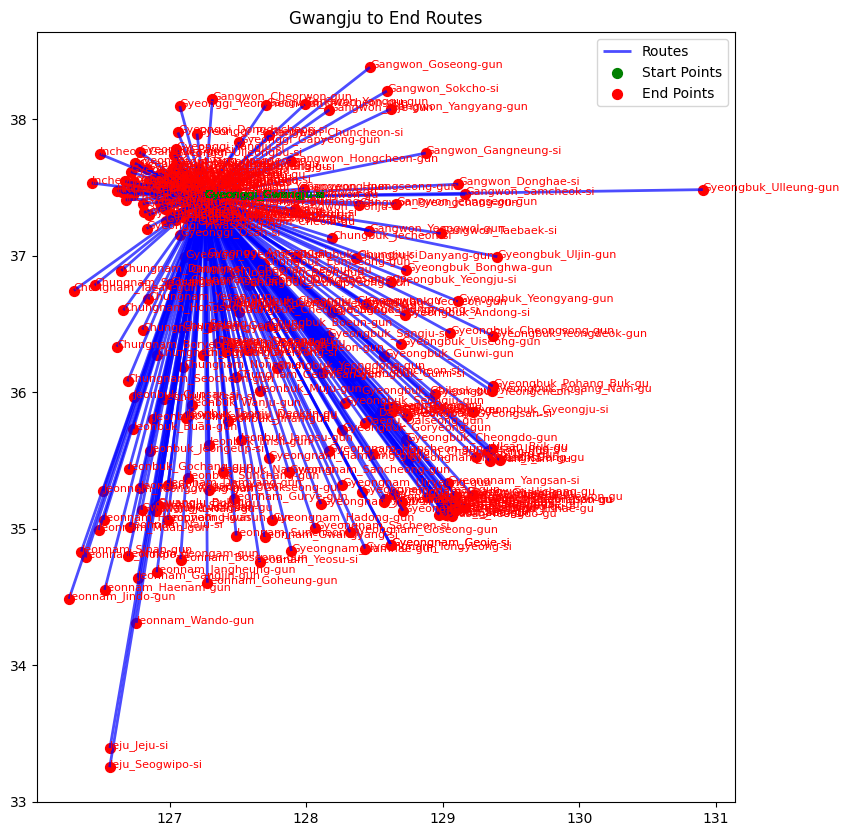

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
# 잘못된 좌표 값 필터링
def safe_point_conversion(point_str):
    try:
        if point_str.strip() == "EMPTY":  # 잘못된 값 처리
            return None
        return Point(map(float, point_str.strip("POINT ()").split()))
    except Exception:
        return None

# Start와 End 지점을 GeoDataFrame으로 변환
Gwangju_truck_od["start_geom"] = Gwangju_truck_od["start_point"].apply(safe_point_conversion)
Gwangju_truck_od["end_geom"] = Gwangju_truck_od["end_point"].apply(safe_point_conversion)

# 유효한 좌표만 포함한 LineString 생성
Gwangju_truck_od["line"] = Gwangju_truck_od.apply(
    lambda row: LineString([row["start_geom"], row["end_geom"]]) if row["start_geom"] and row["end_geom"] else None,
    axis=1,
)

# GeoDataFrame 생성 (유효한 선만 포함)
gwangju_truck_od_gdf = gpd.GeoDataFrame(Gwangju_truck_od.dropna(subset=["line"]), geometry="line")

# 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gwangju_truck_od_gdf.plot(ax=ax, color="blue", linewidth=2, alpha=0.7, label="Routes")

# 시작과 끝 지점을 지도에 추가
gwangju_truck_od_start = gpd.GeoDataFrame(Gwangju_truck_od.dropna(subset=["start_geom"]), geometry="start_geom")
gwangju_truck_od_end = gpd.GeoDataFrame(Gwangju_truck_od.dropna(subset=["end_geom"]), geometry="end_geom")

gwangju_truck_od_start.plot(ax=ax, color="green", markersize=50, label="Start Points")
gwangju_truck_od_end.plot(ax=ax, color="red", markersize=50, label="End Points")

# 레이블과 타이틀 추가
for idx, row in gwangju_truck_od_gdf.iterrows():
    ax.text(row.start_geom.x, row.start_geom.y, row.start_station, fontsize=8, color="green")
    ax.text(row.end_geom.x, row.end_geom.y, row.end_station, fontsize=8, color="red")

plt.title("Gwangju to End Routes")
plt.legend()
plt.show()

지도 시각화    
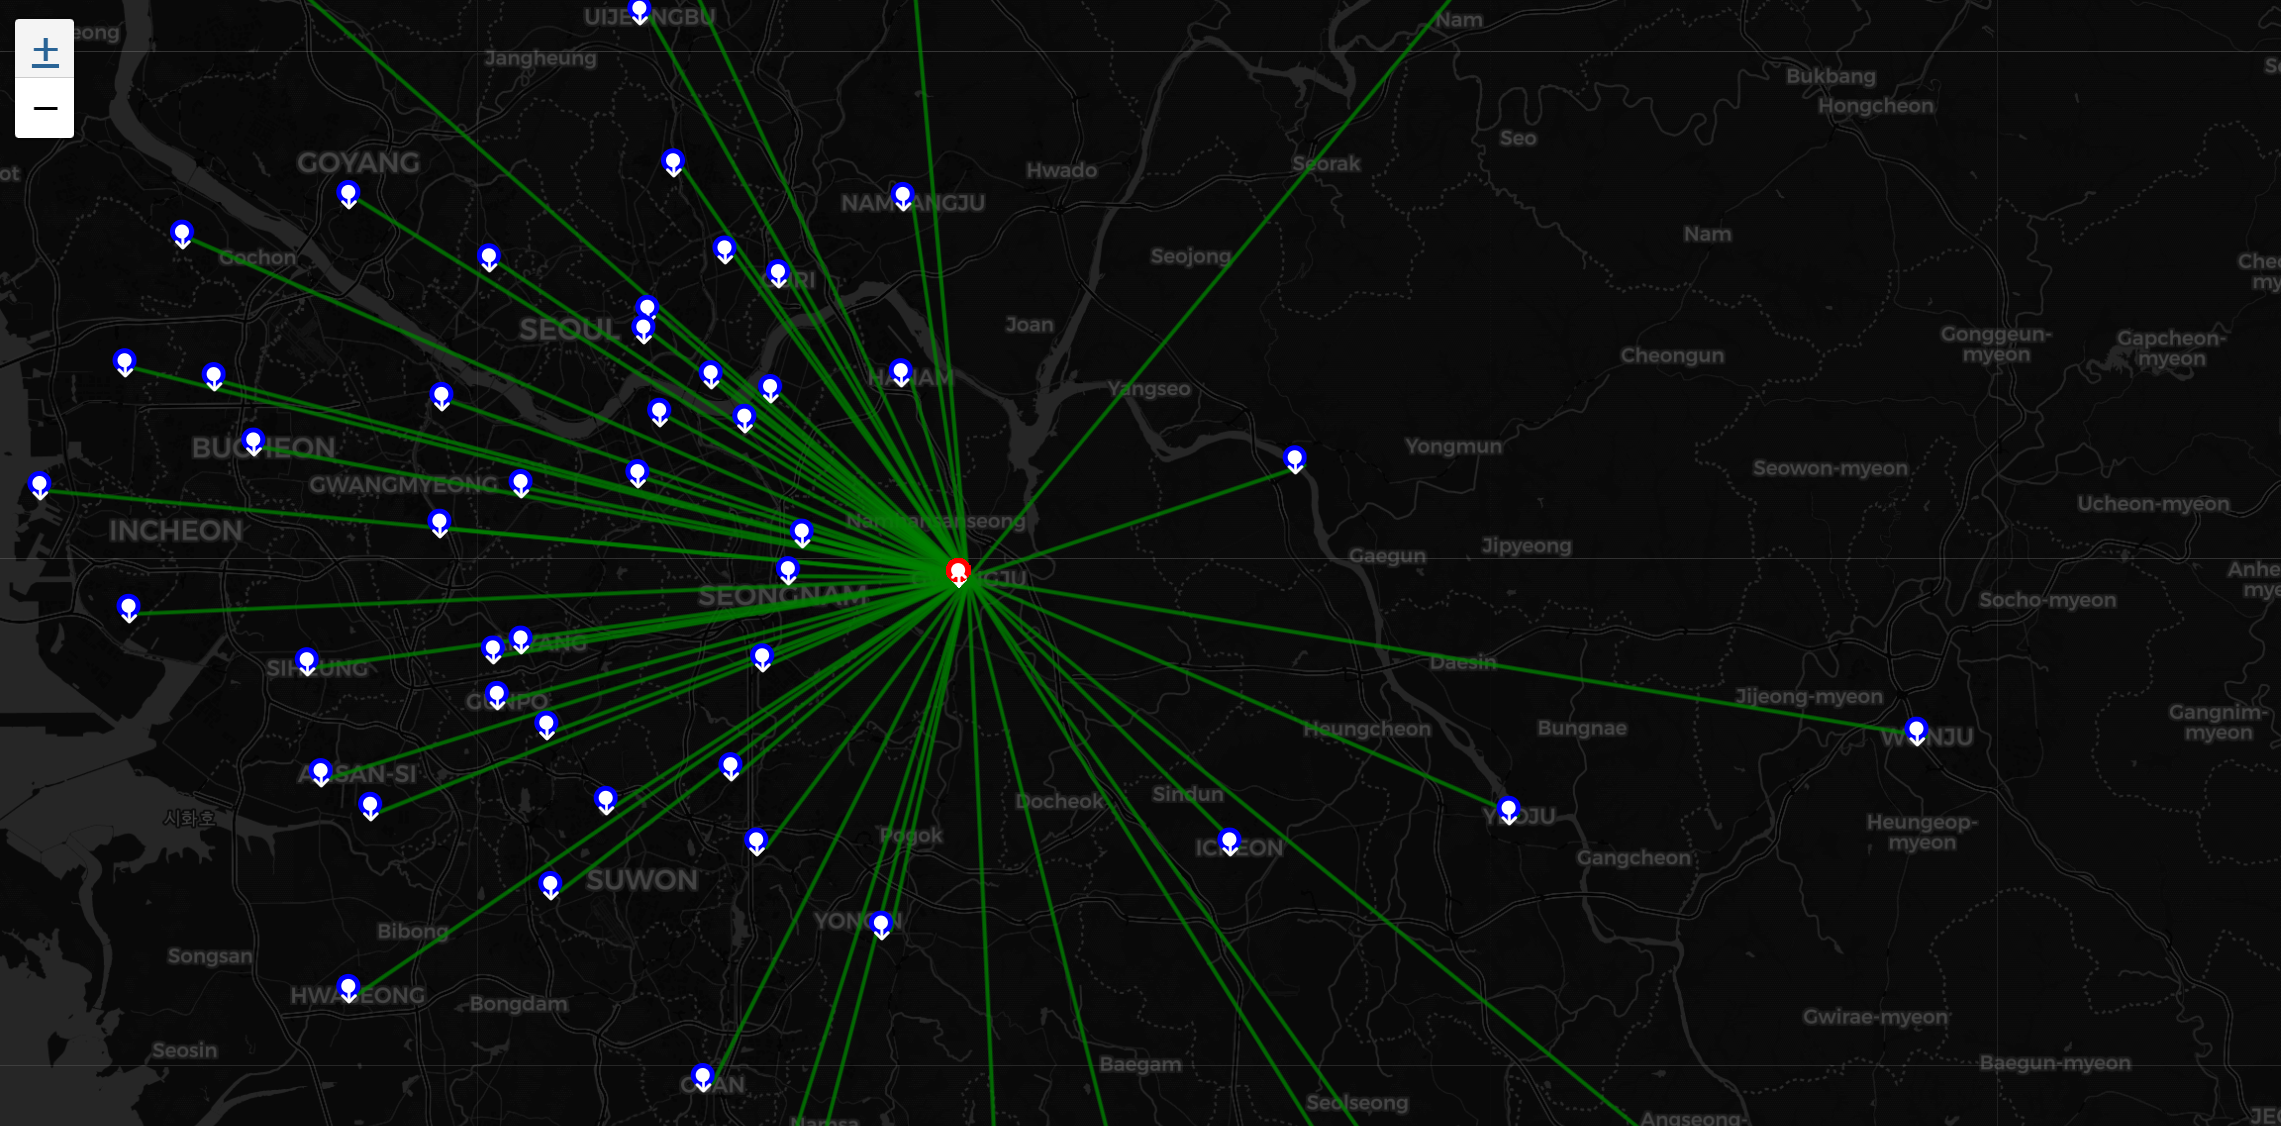

In [49]:
# 특정 값 확인
value_to_check = "Jung-gu"

# 1. 특정 값이 열에 있는지 확인 (True/False 반환)
is_value_present = value_to_check in truck_od["end_시군구"].values
print(f"Is '{value_to_check}' in column1?: {is_value_present}")


Is 'Jung-gu' in column1?: True


In [75]:
# region_mapping 생성
region_mapping = {
    "경기도": "Gyeonggi",
    "서울특별시": "Seoul",
    "인천광역시": "Incheon",
}

# 시군구 매핑 추가
region_mapping_detail = {
    "광주시": "Gwangju-si",
    "서초구": "Seocho-gu",
    "하남시": "Hanam-si",
    "의정부시": "Uijeongbu-si",
    "김포시": "Gimpo-si",
    "계양구": "Gyeyang-gu",
    "금천구": "Geumcheon-gu",
    "구리시": "Guri-si",
    "중랑구": "Jungnang-gu",
    "부천시": "Bucheon-si",
    "시흥시": "Siheung-si",
    "남양주시": "Namyangju-si",
    "용산구": "Yongsan-gu",
    "마포구": "Mapo-gu",
    "강서구": "Gangseo-gu",
    "광명시": "Gwangmyeong-si",
    "고양시": ["Goyang_Deogyang-gu", "Goyang_Ilsandong-gu", "Goyang_Ilsanseo-gu"], # 고양시 구별
    "군포시": "Gunpo-si",
    "중구": "Jung-gu",
}

# 매칭 함수
def match_terminal(row):
    for _, terminal_points_row in terminal_points.iterrows():
        # 시도와 end_도시 매칭 확인
        if region_mapping.get(terminal_points_row["시도"]) == row["end_도시"]:
            # 시군구 매칭 확인
            if region_mapping_detail.get(terminal_points_row["시군구"]) == row["end_시군구"]:
                return terminal_points_row["터미널 명"]
    return None

# 매칭 수행
Gwangju_truck_od_with_sub = Gwangju_truck_od.copy()
Gwangju_truck_od_with_sub["subterminal"] = Gwangju_truck_od_with_sub.apply(match_terminal, axis=1)

# 결과 확인
Gwangju_truck_od_with_sub

,start_time,start_point,start_station,end_point,end_station,소형,대형,전체_화물자동차수(대/일),전체_물동량(톤/일),start_도시,start_시군구,end_도시,end_시군구,start_geom,end_geom,line,start_coords,subterminal
27250,590,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9827989 37.5806949),Seoul_Jongno-gu,35.230769,7.068421,60.855947,134.02877,Gyeonggi,Gwangju-si,Seoul,Jongno-gu,POINT (127.255189 37.4290844),POINT (126.9827989 37.5806949),"LINESTRING (127.255189 37.4290844, 126.9827989...","[127.255189, 37.4290844]",None
27251,548,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9975097 37.5636559),Seoul_Jung-gu,42.815385,4.473684,64.343123,236.55781,Gyeonggi,Gwangju-si,Seoul,Jung-gu,POINT (127.255189 37.4290844),POINT (126.9975097 37.5636559),"LINESTRING (127.255189 37.4290844, 126.9975097...","[127.255189, 37.4290844]",용산Sub
27252,540,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9697994 37.5534363),Seoul_Yongsan-gu,37.592308,8.878947,67.552336,90.26630,Gyeonggi,Gwangju-si,Seoul,Yongsan-gu,POINT (127.255189 37.4290844),POINT (126.9697994 37.5534363),"LINESTRING (127.255189 37.4290844, 126.9697994...","[127.255189, 37.4290844]",중구Sub
27253,564,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (127.0365 37.5635),Seoul_Seongdong-gu,111.730769,30.647368,207.488948,115.76219,Gyeonggi,Gwangju-si,Seoul,Seongdong-gu,POINT (127.255189 37.4290844),POINT (127.0365 37.5635),"LINESTRING (127.255189 37.4290844, 127.0365 37...","[127.255189, 37.4290844]",None
27254,543,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (127.0828 37.5384),Seoul_Gwangjin-gu,96.792308,59.878947,199.549633,105.16795,Gyeonggi,Gwangju-si,Seoul,Gwangjin-gu,POINT (127.255189 37.4290844),POINT (127.0828 37.5384),"LINESTRING (127.255189 37.4290844, 127.0828 37...","[127.255189, 37.4290844]",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,588,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (128.621207 34.8804677),Gyeongnam_Geoje-si,2.923077,0.342105,4.221939,21.92027,Gyeonggi,Gwangju-si,Gyeongnam,Geoje-si,POINT (127.255189 37.4290844),POINT (128.621207 34.8804677),"LINESTRING (127.255189 37.4290844, 128.621207 ...","[127.255189, 37.4290844]",None
27496,569,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (128.1658334 35.5664445),Gyeongnam_Hapcheon-gun,1.946154,1.202632,5.200137,11.67562,Gyeonggi,Gwangju-si,Gyeongnam,Hapcheon-gun,POINT (127.255189 37.4290844),POINT (128.1658334 35.5664445),"LINESTRING (127.255189 37.4290844, 128.1658334...","[127.255189, 37.4290844]",None
27497,559,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.5626653 33.3939924),Jeju_Jeju-si,0.000000,0.000000,0.000000,0.00000,Gyeonggi,Gwangju-si,Jeju,Jeju-si,POINT (127.255189 37.4290844),POINT (126.5626653 33.3939924),"LINESTRING (127.255189 37.4290844, 126.5626653...","[127.255189, 37.4290844]",None
27498,581,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.5610278 33.252845),Jeju_Seogwipo-si,0.000000,0.000000,0.000000,0.00000,Gyeonggi,Gwangju-si,Jeju,Seogwipo-si,POINT (127.255189 37.4290844),POINT (126.5610278 33.252845),"LINESTRING (127.255189 37.4290844, 126.5610278...","[127.255189, 37.4290844]",None


In [76]:
Gwangju_truck_od_with_sub = Gwangju_truck_od_with_sub[Gwangju_truck_od_with_sub["subterminal"].notna()]

Gwangju_truck_od_with_sub

,start_time,start_point,start_station,end_point,end_station,소형,대형,전체_화물자동차수(대/일),전체_물동량(톤/일),start_도시,start_시군구,end_도시,end_시군구,start_geom,end_geom,line,start_coords,subterminal
27251,548,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9975097 37.5636559),Seoul_Jung-gu,42.815385,4.473684,64.343123,236.55781,Gyeonggi,Gwangju-si,Seoul,Jung-gu,POINT (127.255189 37.4290844),POINT (126.9975097 37.5636559),"LINESTRING (127.255189 37.4290844, 126.9975097...","[127.255189, 37.4290844]",용산Sub
27252,540,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9697994 37.5534363),Seoul_Yongsan-gu,37.592308,8.878947,67.552336,90.26630,Gyeonggi,Gwangju-si,Seoul,Yongsan-gu,POINT (127.255189 37.4290844),POINT (126.9697994 37.5534363),"LINESTRING (127.255189 37.4290844, 126.9697994...","[127.255189, 37.4290844]",중구Sub
27256,595,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (127.093 37.6063),Seoul_Jungnang-gu,165.392308,6.089474,201.843943,78.91096,Gyeonggi,Gwangju-si,Seoul,Jungnang-gu,POINT (127.255189 37.4290844),POINT (127.093 37.6063),"LINESTRING (127.255189 37.4290844, 127.093 37....","[127.255189, 37.4290844]",광진ASub
27263,552,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.9015317 37.566571),Seoul_Mapo-gu,34.438462,5.581579,59.133554,135.30521,Gyeonggi,Gwangju-si,Seoul,Mapo-gu,POINT (127.255189 37.4290844),POINT (126.9015317 37.566571),"LINESTRING (127.255189 37.4290844, 126.9015317...","[127.255189, 37.4290844]",종로ASub
27265,557,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.8497 37.5509),Seoul_Gangseo-gu,54.269231,12.610526,95.101379,108.62904,Gyeonggi,Gwangju-si,Seoul,Gangseo-gu,POINT (127.255189 37.4290844),POINT (126.8497 37.5509),"LINESTRING (127.255189 37.4290844, 126.8497 37...","[127.255189, 37.4290844]",동작ASub
27267,563,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.8954 37.4565),Seoul_Geumcheon-gu,98.969231,6.100000,134.042204,143.84438,Gyeonggi,Gwangju-si,Seoul,Geumcheon-gu,POINT (127.255189 37.4290844),POINT (126.8954 37.4565),"LINESTRING (127.255189 37.4290844, 126.8954 37...","[127.255189, 37.4290844]",관악1Sub
27271,592,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (127.0322 37.4835),Seoul_Seocho-gu,125.976923,19.539474,211.008289,335.72877,Gyeonggi,Gwangju-si,Seoul,Seocho-gu,POINT (127.255189 37.4290844),POINT (127.0322 37.4835),"LINESTRING (127.255189 37.4290844, 127.0322 37...","[127.255189, 37.4290844]",강남BSub
27305,580,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.7379078 37.5373539),Incheon_Gyeyang-gu,98.353846,4.744737,119.522907,79.71205,Gyeonggi,Gwangju-si,Incheon,Gyeyang-gu,POINT (127.255189 37.4290844),POINT (126.7379078 37.5373539),"LINESTRING (127.255189 37.4290844, 126.7379078...","[127.255189, 37.4290844]",강서BSub
27331,593,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (127.0339665 37.7380747),Gyeonggi_Uijeongbu-si,212.223077,3.989474,244.342280,333.34575,Gyeonggi,Gwangju-si,Gyeonggi,Uijeongbu-si,POINT (127.255189 37.4290844),POINT (127.0339665 37.7380747),"LINESTRING (127.255189 37.4290844, 127.0339665...","[127.255189, 37.4290844]",강북Sub
27334,585,POINT (127.255189 37.4290844),Gyeonggi_Gwangju-si,POINT (126.7660139 37.5014422),Gyeonggi_Bucheon-si,108.176923,12.321053,155.311489,439.96466,Gyeonggi,Gwangju-si,Gyeonggi,Bucheon-si,POINT (127.255189 37.4290844),POINT (126.7660139 37.5014422),"LINESTRING (127.255189 37.4290844, 126.7660139...","[127.255189, 37.4290844]",구로Sub


In [77]:
Gwangju_truck_od_with_sub["subterminal"].unique()

array(['용산Sub', '중구Sub', '광진ASub', '종로ASub', '동작ASub', '관악1Sub', '강남BSub',
       '강서BSub', '강북Sub', '구로Sub', '동작BSub', '광진BSub', '노원Sub', '금천Sub',
       '서초ASub', '강동A Sub', '강서ASub', '강남ASub & 강남DSub'], dtype=object)

In [79]:
Gwangju_truck_od_with_sub.to_csv("data/Gwangju_truck_od_with_sub.csv", index=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_41656\3773671759.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gwangju_truck_od_with_sub["start_geom"] = Gwangju_truck_od_with_sub["start_point"].apply(safe_point_conversion)
C:\Users\USER\AppData\Local\Temp\ipykernel_41656\3773671759.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gwangju_truck_od_with_sub["end_geom"] = Gwangju_truck_od_with_sub["end_point"].apply(safe_point_conversion)
C:\Users\USER\AppData\Local\Temp\ipykernel_41656\3773671759.py:18:

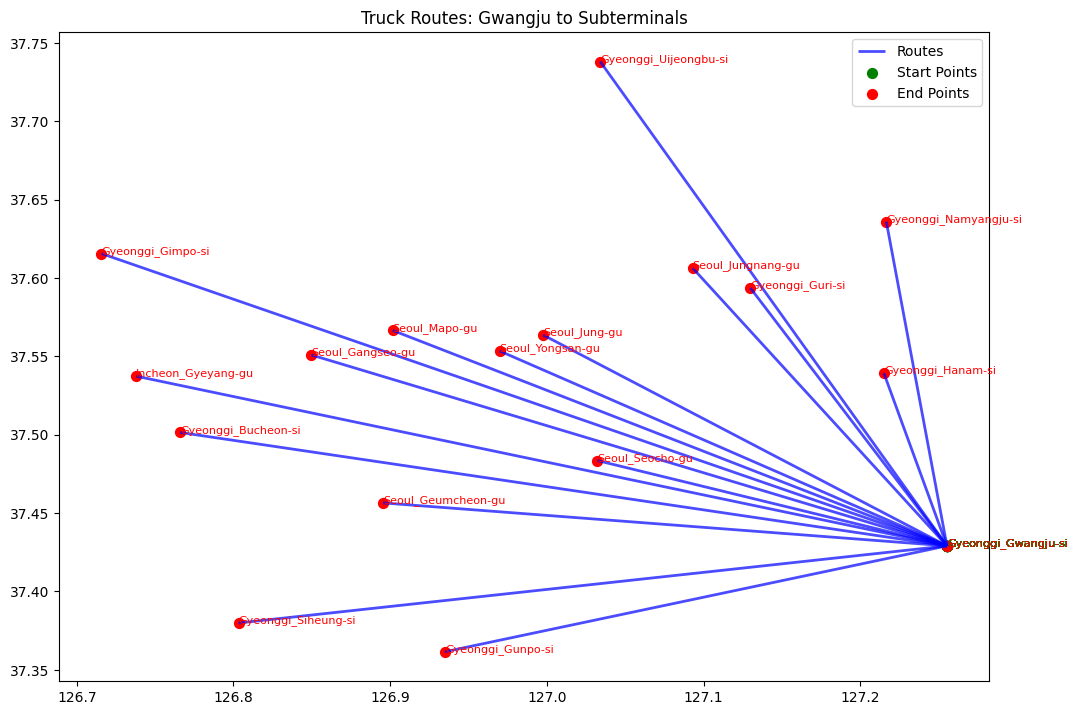

In [78]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# 잘못된 좌표 값 필터링 함수
def safe_point_conversion(point_str):
    try:
        if point_str.strip() == "EMPTY":  # 잘못된 값 처리
            return None
        return Point(map(float, point_str.strip("POINT ()").split()))
    except Exception:
        return None

# 좌표 변환 및 LineString 생성
Gwangju_truck_od_with_sub["start_geom"] = Gwangju_truck_od_with_sub["start_point"].apply(safe_point_conversion)
Gwangju_truck_od_with_sub["end_geom"] = Gwangju_truck_od_with_sub["end_point"].apply(safe_point_conversion)
Gwangju_truck_od_with_sub["line"] = Gwangju_truck_od_with_sub.apply(
    lambda row: LineString([row["start_geom"], row["end_geom"]]) if row["start_geom"] and row["end_geom"] else None,
    axis=1,
)

# GeoDataFrame 생성
truck_od_with_sub_gdf = gpd.GeoDataFrame(Gwangju_truck_od_with_sub.dropna(subset=["line"]), geometry="line")

# 시각화
fig, ax = plt.subplots(figsize=(12, 12))

# 경로(LineString) 시각화
truck_od_with_sub_gdf.plot(ax=ax, color="blue", linewidth=2, alpha=0.7, label="Routes")

# 시작점과 끝점을 GeoDataFrame으로 변환
truck_od_start_gdf = gpd.GeoDataFrame(Gwangju_truck_od_with_sub.dropna(subset=["start_geom"]), geometry="start_geom")
truck_od_end_gdf = gpd.GeoDataFrame(Gwangju_truck_od_with_sub.dropna(subset=["end_geom"]), geometry="end_geom")

# 시작점과 끝점 시각화
truck_od_start_gdf.plot(ax=ax, color="green", markersize=50, label="Start Points")
truck_od_end_gdf.plot(ax=ax, color="red", markersize=50, label="End Points")

# 레이블 추가
for idx, row in truck_od_with_sub_gdf.iterrows():
    ax.text(row.start_geom.x, row.start_geom.y, row.start_station, fontsize=8, color="green")
    ax.text(row.end_geom.x, row.end_geom.y, row.end_station, fontsize=8, color="red")

# 타이틀 및 범례
plt.title("Truck Routes: Gwangju to Subterminals")
plt.legend()
plt.show()

### 행정동별 화물차와 물동량 데이터를 sub터미널 위치와 매핑하여 나타냄 

- 고양시의 경우 여러 동에 존재하는데 기존 데이터에 그걸 반영할 수가 없어서   
    하나의 터미널과 매칭하도록 하게만 함
- 특정 서브 터미널로 가는 평균 화물차 대수와 물동량이 존재함
    - 구에서 동으로 쪼개질 때 해당 물동량을 통해 언니가 제시한 방법???